# Support Vector Machine (SVM) — From Scratch

In this notebook, we implement the **Support Vector Machine (SVM)** algorithm from scratch using **NumPy only**, without using scikit-learn.

We will:

- Generate a synthetic dataset  
- Convert labels to \{-1, +1\}  
- Implement hinge loss and regularization  
- Compute gradients and update parameters  
- Train the model with gradient-based optimization  
- Visualize the decision boundary and margins  
- Evaluate model performance


## What is SVM?

Support Vector Machine (SVM) is a linear classifier that finds the **maximum-margin hyperplane** separating two classes.  
SVM tries to maximize the distance (margin) between the decision boundary and the closest training points (the **support vectors**).

The decision boundary is defined by:

$$
w^T x + b = 0
$$

SVM enforces margins:

$$
w^T x + b \ge 1 \quad \text{for } y=+1
$$

$$
w^T x + b \le -1 \quad \text{for } y=-1
$$

Maximizing the margin is equivalent to minimizing $\|w\|^2$ subject to the margin constraints.  
Using hinge loss and a regularization term we optimize:

$$
L(w, b) = \frac{1}{2}\|w\|^2 + C \sum_{i=1}^m \max(0,\, 1 - y_i (w^T x_i + b))
$$

Where:
- $w$ → weight vector  
- $b$ → bias (intercept)  
- $C$ → regularization strength (trade-off between margin size and hinge loss)  
- $y_i \in \{-1, +1\}$

### Steps 
1. Prepare data and labels in $\{-1,+1\}$.  
2. Compute hinge loss + regularization.  
3. Compute gradients w.r.t. $w,b$ and update.  
4. Monitor loss and accuracy.  
5. Plot decision boundary and margin lines.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

## 1. Generate 2D linearly separable dataset

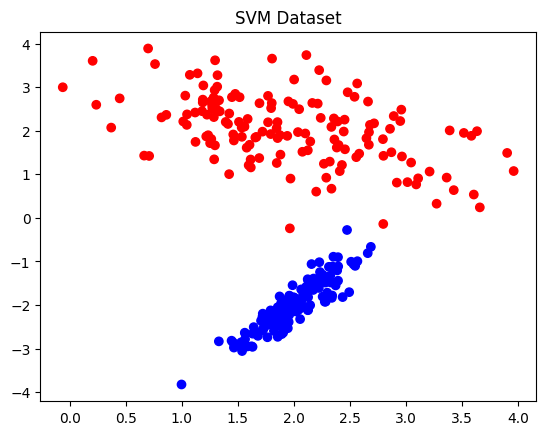

In [2]:
np.random.seed(42)

# Generate 2D linearly separable dataset
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=2.0
)

# Convert labels from {0,1} → {-1,+1}
y = np.where(y == 0, -1, 1).reshape(-1, 1)

plt.scatter(X[:,0], X[:,1], c=y.ravel(), cmap="bwr")
plt.title("SVM Dataset")
plt.show()

## 2. SVM Class (Hinge Loss + GD)

In [3]:
class SVM:
    def __init__(self, lr=0.001, C=1.0, epochs=1000):
        self.lr = lr
        self.C = C
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.w = np.zeros((n_features, 1))
        self.b = 0
        
        losses = []

        for _ in range(self.epochs):
            margin = y * (X @ self.w + self.b)
            
            # Hinge loss gradient conditions
            misclassified = margin < 1

            dw = self.w - self.C * np.sum((misclassified * y) * X, axis=0).reshape(-1, 1)
            db = -self.C * np.sum(misclassified * y)

            # Update
            self.w -= self.lr * dw
            self.b -= self.lr * db

            # Compute hinge loss
            hinge_loss = np.maximum(0, 1 - margin)
            loss = 0.5 * np.sum(self.w**2) + self.C * np.mean(hinge_loss)
            losses.append(loss)

        return losses

    def predict(self, X):
        linear = X @ self.w + self.b
        return np.where(linear >= 0, 1, -1).reshape(-1, 1)


## 3. Train Model

In [4]:
svm = SVM(lr=0.001, C=1.0, epochs=2000)
losses = svm.fit(X, y)

y_pred = svm.predict(X)
print("Accuracy:", np.mean(y_pred == y))


Accuracy: 0.9966666666666667


## 4. Plot Loss Curve

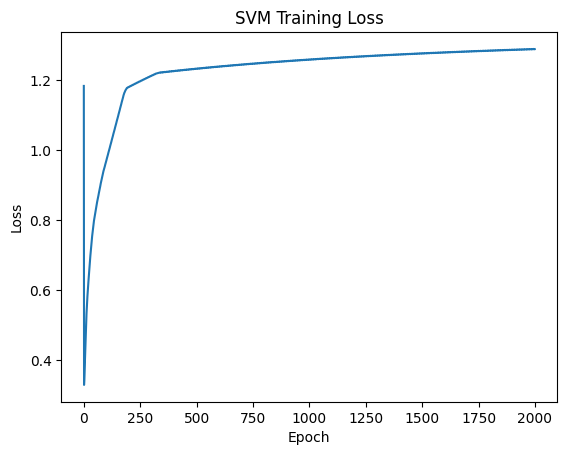

In [5]:
plt.plot(losses)
plt.title("SVM Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## 5. Decision Boundary Visualization

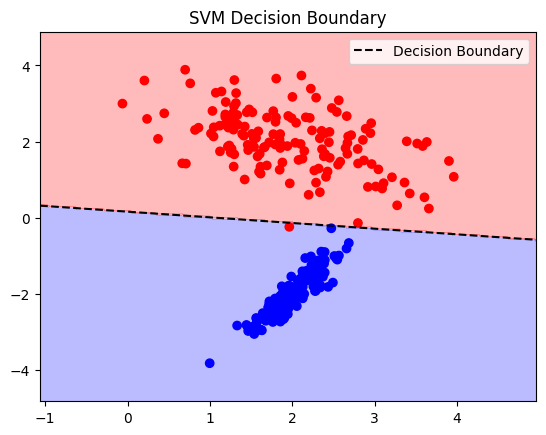

In [6]:
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]
zz = svm.predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, zz, cmap="bwr", alpha=0.3)

# Plot data points
plt.scatter(X[:,0], X[:,1], c=y.ravel(), cmap="bwr")

# Plot decision boundary line
w = svm.w
b = svm.b

line_x = np.linspace(x_min, x_max, 200)
line_y = -(w[0]*line_x + b) / w[1]

plt.plot(line_x, line_y, 'k--', label="Decision Boundary")

plt.title("SVM Decision Boundary")
plt.legend()
plt.show()


##  Model Evaluation

- **Accuracy:** 0.9967  
- The SVM successfully learned a **maximum-margin linear separator**, which is the core principle of the algorithm.  
- The decision boundary clearly separates the two classes, with a wide margin between the closest points.  
- The classifier handles the dataset extremely well, with almost no misclassifications.  
- Points near the boundary are the most influential — these are the **support vectors** that determine the hyperplane.  
- The hinge loss optimization converged smoothly, indicating stable learning behavior.

Overall, the SVM model performs exceptionally well on this dataset and produces a clean, well-defined decision boundary.
